**Regression with Scikit Learn - Machine Learning with Python**

**Project Outline**

A typical problem statement for machine learning
Downloading and exploring a dataset for machine learning
Linear regression with one variable using Scikit-learn
Linear regression with multiple variables
Using categorical features for machine learning
Other models and techniques for regression using Scikit-learn
Applying linear regression to other datasets

**Problem Statement**

This project takes a practical and coding-focused approach. We'll define the terms machine learning and linear regression in the context of a problem, and later generalize their definitions. We'll work through a typical machine learning problem step-by-step:

**QUESTION:** ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME,**you're tasked with creating an automated system to estimate the annual medical expenditure for new customers,**using information such as their age, sex, BMI, children, smoking habits and region of residence.


Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.


You're given a CSV file containing verified historical data, consisting of the aforementioned information and the actual medical

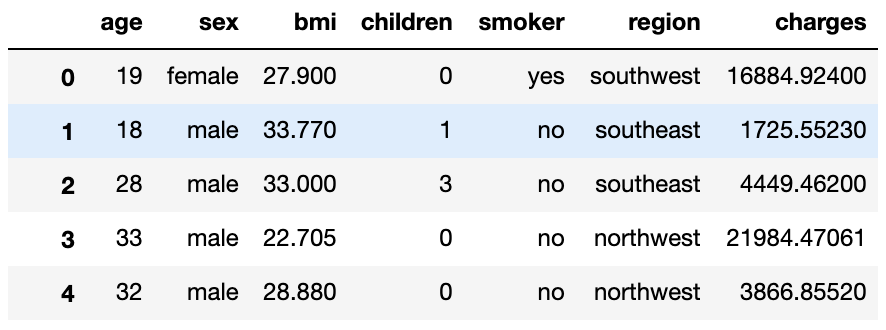

charges incurred by over 1300 customers. 




We can now create a Pandas dataframe using the downloaded file, to view and analyze the data.

In [46]:
import pandas as pd
import numpy as np

In [47]:
medical = pd.read_csv("insurance.csv")

In [48]:
medical

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The dataset contains 1338 rows and 7 columns. Each row of the dataset contains information about one customer.


Our objective is to find a way to estimate the value in the "charges" column using the values in the other columns. If we can do so for the historical data, then we should able to estimate charges for new customers too, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and region.


Let's check the data type for each column.

In [49]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Looks like "age", "children", "bmi" [Body Mass Index - Wikipedia](https://en.wikipedia.org/wiki/Body_mass_index) and "charges" are numbers, whereas "sex", "smoker" and "region" are strings (possibly categories). None of the columns contain any missing values, which saves us a fair bit of work!

Here are some statistics for the numerical columns:

In [50]:
medical.describe()#it means statistics operations

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Exploratory Analysis and Visualization**

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "charges" and other columns.

We'll use libraries Matplotlib, Seaborn and Plotly for visualization.

In [8]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

**Age**

Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

In [51]:
medical.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [52]:
fig = px.histogram(medical,
                   x = "age",
                   marginal= "box",
                   nbins= 47,
                   title = "Age distribution")
fig.update_layout(bargap = 0.05)
fig.show()

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. The uniform distribution might arise from the fact that there isn't a big variation in the [number of people of any given age](https://www.statista.com/statistics/241488/population-of-the-us-by-sex-and-age/)(between 18 & 64) in the USA.

**Body Mass Index**

Let's look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.

In [53]:
fig = px.histogram(medical,
                   x = "bmi",
                   marginal= "box",
                   title = "Age distribution")
fig.update_layout(bargap = 0.05)
fig.show()

**Charges**

Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

<Axes: xlabel='charges', ylabel='Count'>

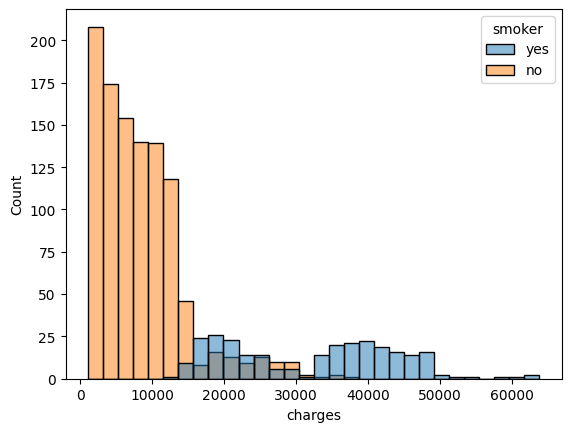

In [54]:
sns.histplot(medical,x = "charges",hue = "smoker")

In [55]:
fig = px.histogram(medical,
                   x = "charges",
                   title = "Annual charges",
                   color = "smoker")
fig.update_layout(bargap = 0.05)
fig.show()

We can make the following observations from the above graph:


For most customers, the annual medical charges are under $10,000. Only a small fraction of customer have higher medical expenses, possibly due to 

accidents, major illnesses and genetic diseases. The distribution follows a "power law"

There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is $7300, the median for smokers is 

close to $35,000.

**Smoker**

Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

In [56]:
px.histogram(medical,
             x = "smoker",
             color = "sex")

It appears that 20% of customers have reported that they smoke. Can you verify whether this matches the national average, assuming the data was collected 
in 2010? We can also see that smoking appears a more common habit among males. Can you verify this?

Having looked at individual columns, we can now visualize the relationship between "charges" (the value we wish to predict) and other columns.

**Age and Charges**

Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

In [57]:
px.scatter(medical,
           x = "age",
           y = "charges",
           color = "smoker",
           title = "Age vs Charges")

We can make the following observations from the above chart:

• he general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's 
  clear that age alone cannot be used to accurately determine medical charges.

• We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others.

2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".

3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

**BMI and Charges**

Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

In [58]:
px.histogram(medical,
             x = "bmi",
             y = "charges",
             color = "smoker",
             title = "BMI vs Charges")


It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

What other insights can you gather from the above graph?

**Correlation**

As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the correlation coefficient, which can be computed using the .corr method of a Pandas series.

In [59]:
medical.charges.corr(medical.age)

np.float64(0.2990081933306478)

In [60]:
medical.charges.corr(medical.bmi)

np.float64(0.19834096883362887)

In [61]:
medical

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To compute the correlation for categorical columns, they must first be converted into numeric columns.

In [62]:
smoker_val = {"yes":1 , "no":0}
smoker_num = medical.smoker.map(smoker_val)
medical.charges.corr(smoker_num)

np.float64(0.7872514304984778)

Here's how correlation coefficients can be interpreted ([source](https://statisticsbyjim.com/basics/correlations/)):

• **Strength**: The greater the absolute value of the correlation coefficient, the stronger the relationship.

 • The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change   in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

• A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.

• When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.

• **Direction**: The sign of the correlation coefficient represents the direction of the relationship.

• Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.

• Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Here's the same relationship expressed visually ([source](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/)):

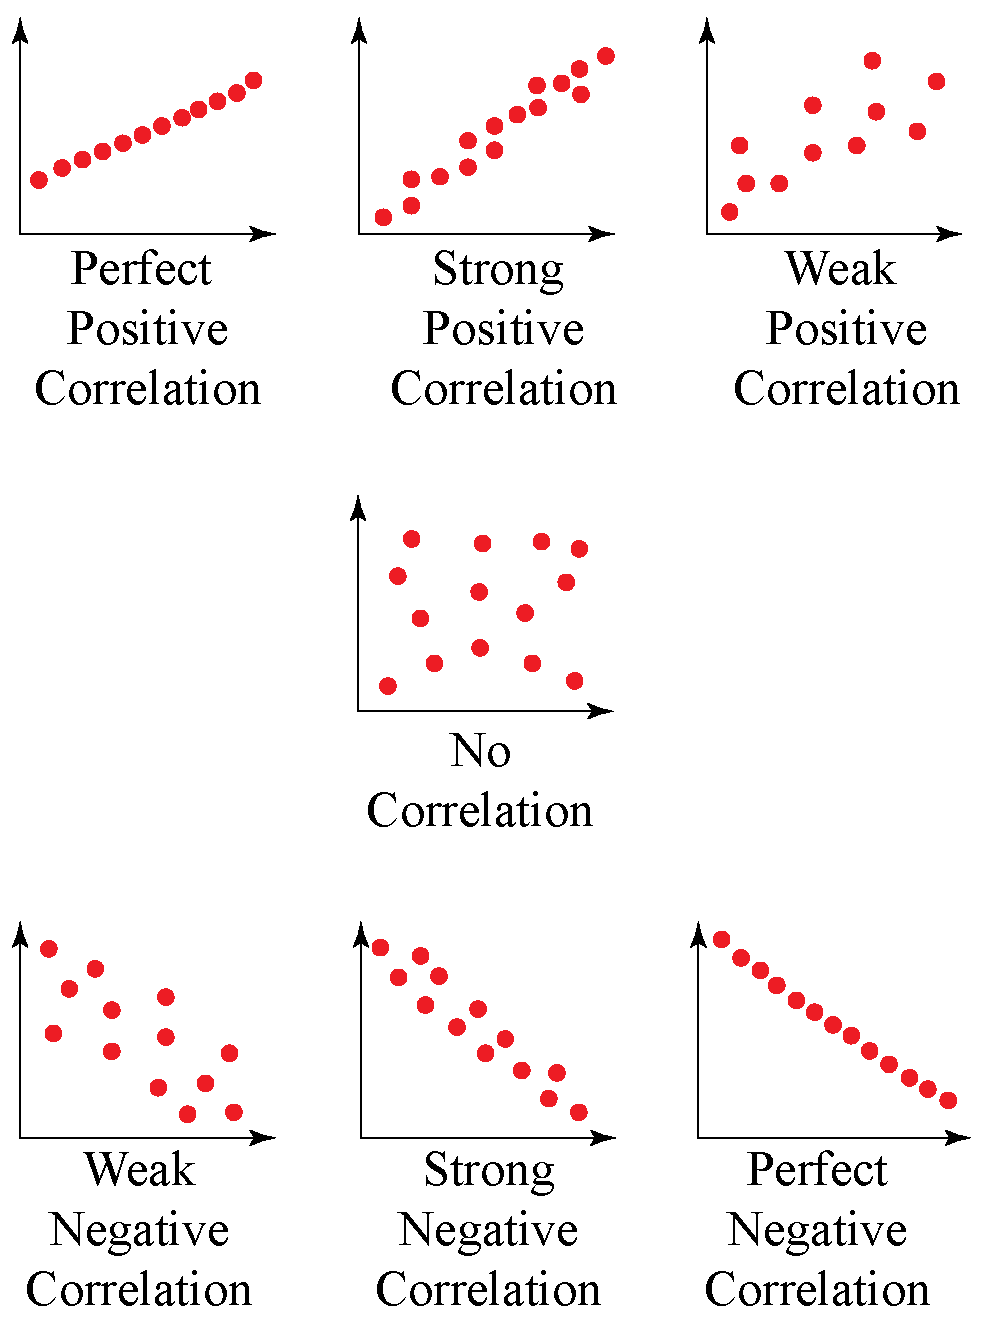


Pandas dataframes also provide a .corr method to compute the correlation coefficients between all pairs of numeric columns.

**Linear Regression using a Single Feature**

We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [63]:
non_smoker = medical[medical.smoker == "no"]
print(non_smoker)

      age     sex     bmi  children smoker     region      charges
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
...   ...     ...     ...       ...    ...        ...          ...
1332   52  female  44.700         3     no  southwest  11411.68500
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500

[1064 rows x 7 columns]


<Axes: xlabel='age', ylabel='charges'>

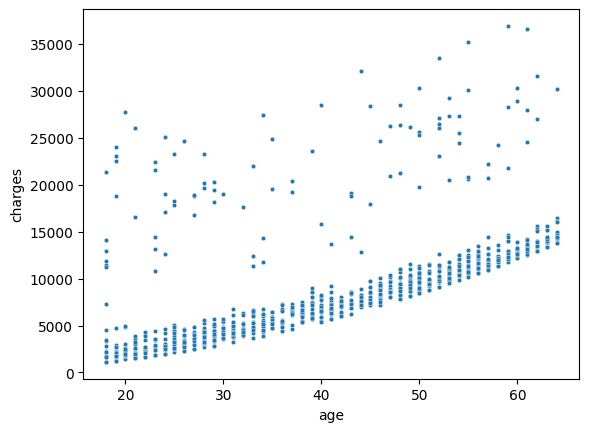

In [64]:
sns.scatterplot(data=non_smoker, x='age',y='charges',s=10)

Apart from a few exceptions, the points seem to form a line. We'll try and "fit" a line using this points, and use the line to predict charges for a given age. A line on the X&Y coordinates has the following formula:

**y = wx+b**

The line is characterized two numbers: w  (called "slope") and b (called "intercept").




**Model**

In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assuming the following relationship between the two:

**charges = w x age + b**

We'll try determine w and b or the line that best fits the data.

• This technique is called linear regression, and we call the above equation a linear regression model, because it models the relationship between "age" and "charges" as a straight line.

• The numbers w and b are called the parameters or weights of the model.

• The values in the "age" column of the dataset are called the inputs to the model and the values in the charges column are called "targets".

Let define a helper function estimate_charges, to compute **charges**, given **age**, **w** and **b**


In [93]:
def estimate_charges(age, w, b):
  return w * age + b

The estimate_charges function is our very first model.

Let's guess the values for w and b and use them to estimate the value for charges.

In [94]:
w = 50
b = 100

In [95]:
ages = non_smoker.age
estimated_charges = estimate_charges(ages, w, b)

We can plot the estimated charges using a line graph.

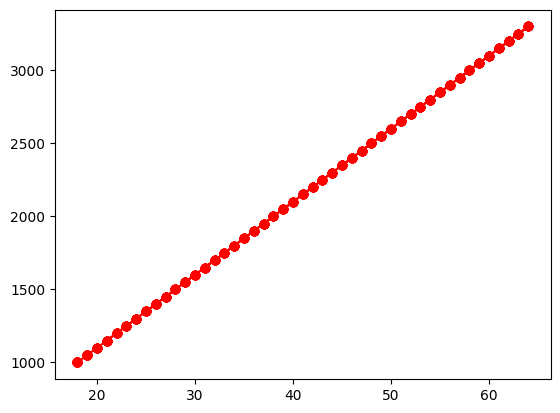

In [96]:
plt.plot(ages,estimated_charges, 'r-o')

As expected, the points lie on a straight line.

We can overlay this line on the actual data, so see how well our model fits the data.

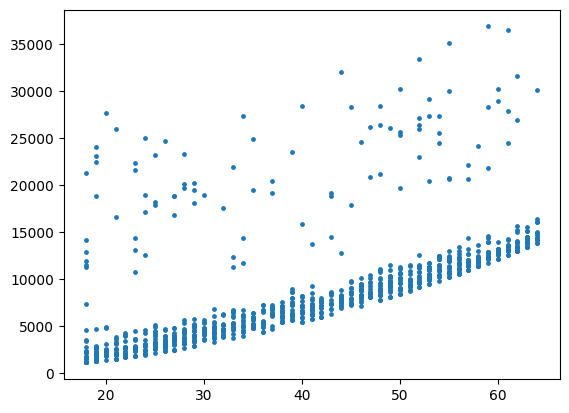

In [98]:
target = non_smoker.charges
plt.scatter(ages,target,s=6)

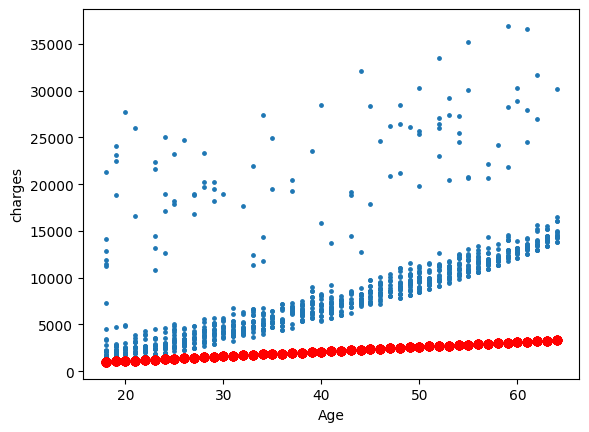

In [99]:
target = non_smoker.charges
plt.plot(ages,estimated_charges, 'r-o',alpha=0.7)
plt.scatter(ages,target,s=6)
plt.xlabel('Age');
plt.ylabel("charges");


Clearly, the our estimates are quite poor and the line does not "fit" the data. However, we can try different values of w and b
 to move the line around. Let's define a helper function try_parameters which takes w and b as inputs and creates the above plot.

In [100]:
def try_parameters(w, b):
  ages = non_smoker.age
  target = non_smoker.charges

  estimated_charges = estimate_charges(ages, w, b)

  plt.plot(ages,estimated_charges, 'r-o',alpha=0.7)
  plt.scatter(ages,target,s=6)
  plt.xlabel('Age');
  plt.ylabel("charges");

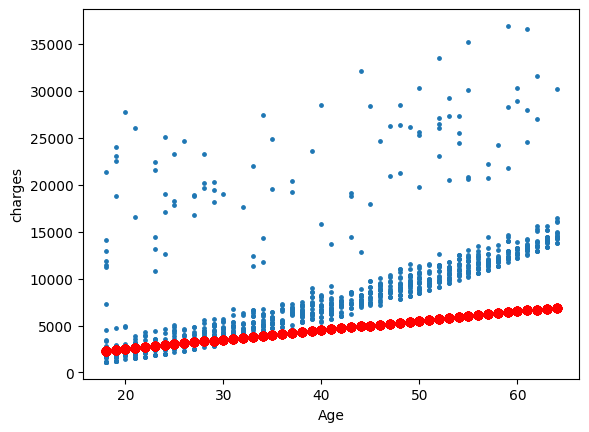

In [101]:
try_parameters(100,500)

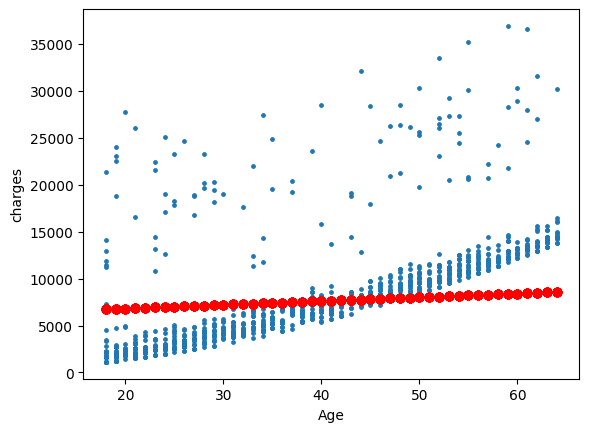

In [102]:
try_parameters(40, 6000)